In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = str(1)

In [2]:
import tensorflow_probability.substrates.jax as tfp
import flax.linen as nn
import jax
import jax.numpy as jnp
import optax
from functools import partial
import seaborn as sns
import tensorflow as tf

dist = tfp.distributions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from dataloader import *
from retrain_fun import *
import datetime
import scipy.stats as st
import random

random.seed(0)
np.random.seed(0)
jax.random.PRNGKey(0)
os.environ["XLA_FLAGS"] = "--xla_gpu_deterministic_reductions --xla_gpu_autotune_level=2"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"

2023-05-07 21:50:01.606946: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_aggregated, houses = data_preprocess()

In [4]:
train_list = [[2361, 7719, 9019, 2335, 7951]]
test_list = [[4373, 7901, 3456, 3538, 2818]]
pool_list = []
for i in range(len(train_list)):
    pool = [j for j in houses if j not in train_list[i] + test_list[i]]
    pool_list.append(pool)

In [5]:
data_aggregated

,clotheswasher1,dishwasher1,air1,refrigerator1,furnace1,dataid,localminute,aggr
2407,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:00:00-06,0.132
2408,0.000,0.001,0.004,0.120,0.006,3538,2018-01-01 00:01:00-06,0.131
2409,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:02:00-06,0.132
2410,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:03:00-06,0.132
2411,0.000,0.001,0.005,0.119,0.006,3538,2018-01-01 00:04:00-06,0.131
...,...,...,...,...,...,...,...,...
13100534,0.002,0.001,0.000,0.004,0.003,7951,2018-02-07 15:26:00-06,0.010
13100535,0.002,0.001,0.000,0.004,0.003,7951,2018-02-07 15:27:00-06,0.010
13100536,0.002,0.001,0.000,0.011,0.003,7951,2018-02-07 15:28:00-06,0.017
13100537,0.002,0.000,0.000,0.004,0.003,7951,2018-02-07 15:29:00-06,0.009


In [6]:
pool_list

[[5746, 8565, 9278, 8156, 8386, 9160, 661, 1642, 7536, 7800]]

In [7]:
len(pool_list[0])

10

Train Set No: 1
Iteration No:  0
(70370, 5)


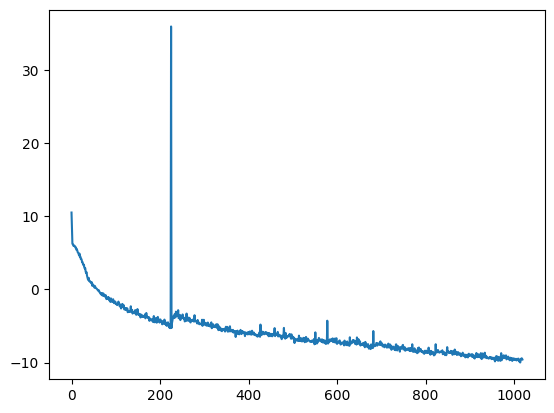

(2, 71995, 5)
RMSE : [874.1137    72.73692  234.21764   55.417847 502.5559  ] MAE  : [370.93323   43.826195 121.70309   24.835651 295.3451  ] NLL : 7867.138671875
Iteration No:  1


/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8156]


2023-05-07 21:53:56.298188: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[113214,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[113214,50,99]{2,1,0}, f32[50,50,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


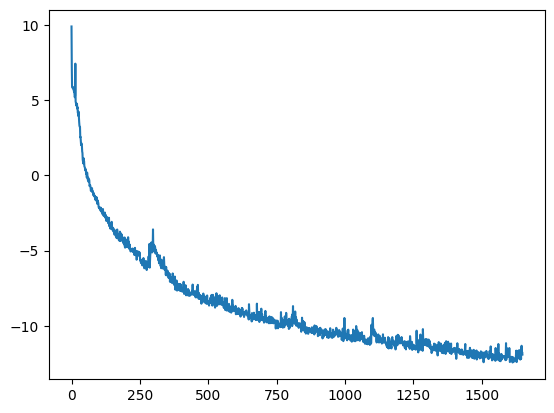

RMSE : [796.9091    73.32807  197.44505   83.418755 504.26193 ] MAE  : [336.9009    45.349533  99.10859   30.029428 270.16418 ] NLL : 7.545393466949463
Iteration No:  2


/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8156 8565]


2023-05-07 21:56:40.960563: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[163613,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[163613,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-07 21:56:42.046893: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[163613,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[163613,40,99]{2,1,0}, f32[50,40,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05

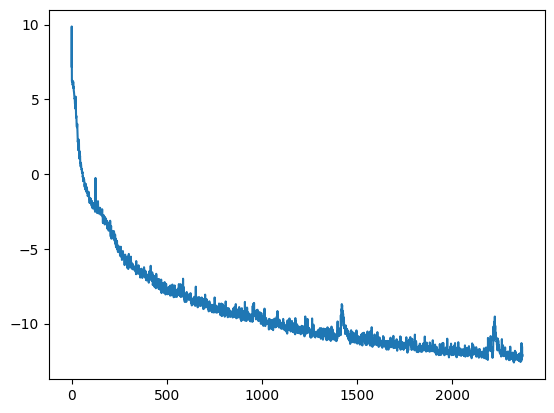

RMSE : [249.32309   64.19685  116.85539   32.527225  88.25427 ] MAE  : [90.167656 38.236385 61.969753  9.299639 16.175865] NLL : 12.583305358886719
Iteration No:  3


/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8156 8565 1642]


2023-05-07 21:59:14.513474: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[221212,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[221212,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-07 21:59:15.662505: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[221212,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[221212,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-07 21:

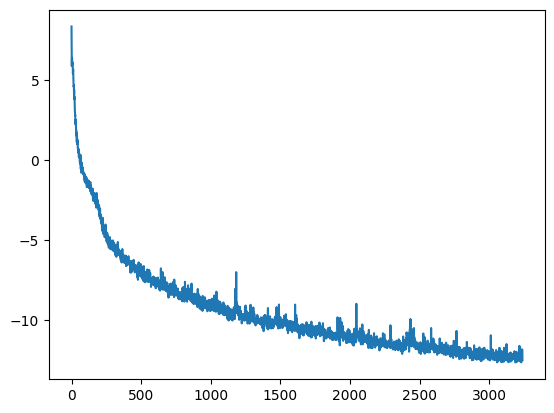

RMSE : [212.46233  60.71937 103.92974  44.25002 122.1113 ] MAE  : [66.32273  35.2193   55.488094 10.867565 21.81524 ] NLL : 4.960274696350098
Iteration No:  4


/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8156 8565 1642 9160]


2023-05-07 22:01:41.083767: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[298971,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[298971,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-07 22:01:42.589804: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[298971,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[298971,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-07 22:

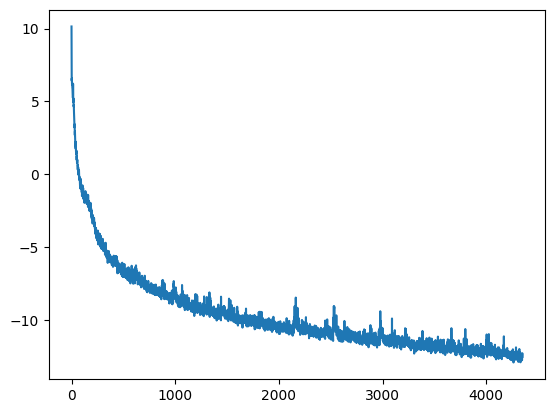

RMSE : [168.10474   60.402172  89.564575  35.60953  138.79417 ] MAE  : [54.437027 33.6175   47.57433   8.496255 24.281603] NLL : 5.478357791900635
Iteration No:  5


/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8156 8565 1642 9160 9278]


2023-05-07 22:04:04.868337: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[370970,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[370970,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-07 22:04:06.686268: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[370970,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[370970,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-07 22:

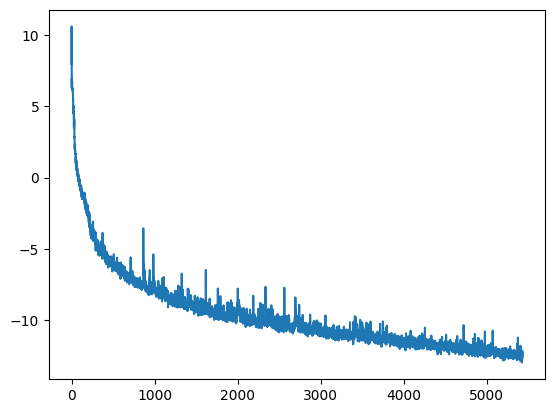

RMSE : [125.448616  57.84117   81.01338   30.717638  65.54747 ] MAE  : [49.357338 31.460299 41.009743  6.107175  9.42086 ] NLL : 7.931121349334717
Iteration No:  6


/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8156 8565 1642 9160 9278 7536]


2023-05-07 22:06:23.096290: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[448549,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[448549,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-07 22:06:25.292515: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[448549,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[448549,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


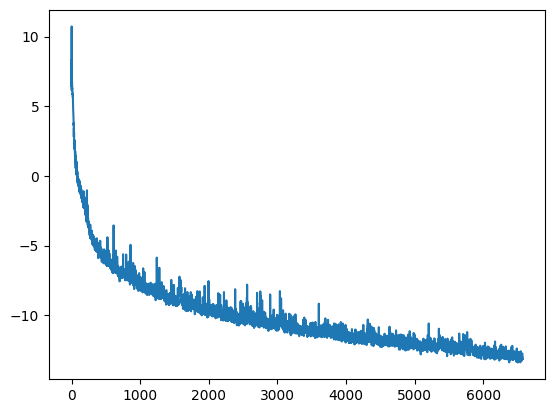

RMSE : [128.98363   57.50099   83.38569   28.283707  73.82375 ] MAE  : [47.905937  30.49645   41.418377   5.1942377  9.991683 ] NLL : 11.643967628479004
Iteration No:  7


/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8156 8565 1642 9160 9278 7536  661]


2023-05-07 22:08:37.705342: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[534933,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[534933,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-07 22:08:40.265110: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[534933,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[534933,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


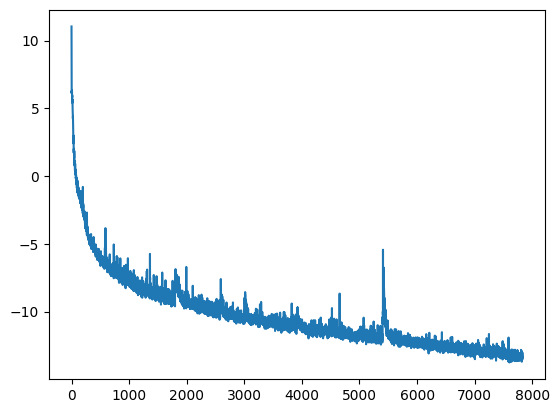

RMSE : [140.32614   56.741848  77.52199   28.789408  64.36252 ] MAE  : [51.74238  29.623821 38.516228  5.524585  8.619263] NLL : 12.957480430603027
Iteration No:  8


/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8156 8565 1642 9160 9278 7536  661 5746]


2023-05-07 22:10:49.792483: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[628532,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[628532,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-07 22:10:52.818638: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[628532,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[628532,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


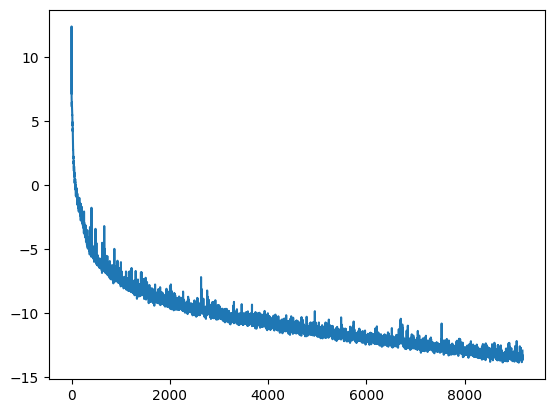

RMSE : [124.67539   56.97905   79.935234  29.557022  74.418655] MAE  : [46.80274   29.090317  37.835934   5.9857297 10.715886 ] NLL : 19.892242431640625
Iteration No:  9


/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8156 8565 1642 9160 9278 7536  661 5746 7800]


2023-05-07 22:13:03.527326: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[729331,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[729331,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


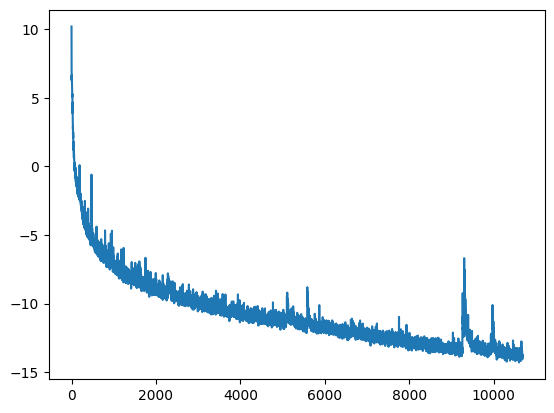

RMSE : [114.73088   56.02218   77.62991   27.978224  66.8983  ] MAE  : [41.538406 28.177666 36.516     4.913668 10.406894] NLL : 10.173975944519043


In [8]:
total_rmse = []
houseids = []
for i in range(len(train_list)):
    # print(len(train_list))
    print("Train Set No:", i + 1)
    train_houses = train_list[i]
    test_houses = test_list[i]
    pool_houses = pool_list[i]
    # change 1 - removing train test var from function
    train = data_aggregated[data_aggregated["dataid"].isin(train_houses)]
    test = data_aggregated[data_aggregated["dataid"].isin(test_houses)]

    maes = []
    rmse_iter = []
    houses = []
    start = [
        "2018-03-01 00:00:00-06",
        "2018-03-11 00:00:00-06",
        "2018-03-16 00:00:00-06",
        "2018-03-21 00:00:00-06",
        "2018-03-26 00:00:00-06",
        "2018-04-01 00:00:00-06",
        "2018-04-06 00:00:00-06",
        "2018-04-11 00:00:00-06",
        "2018-04-16 00:00:00-06",
        "2018-04-21 00:00:00-06",
    ]
    end = [
        "2018-03-10 23:59:00-06",
        "2018-03-15 23:59:00-06",
        "2018-03-20 23:59:00-06",
        "2018-03-25 23:59:00-06",
        "2018-03-31 23:59:00-06",
        "2018-04-05 23:59:00-06",
        "2018-04-10 23:59:00-06",
        "2018-04-15 23:59:00-06",
        "2018-04-20 23:59:00-06",
        "2018-04-25 23:59:00-06",
    ]
    dates = [
        "2018-03-01 00:00:00-06",
        "2018-03-06 00:00:00-06",
        "2018-03-11 00:00:00-06",
        "2018-03-16 00:00:00-06",
        "2018-03-21 00:00:00-06",
        "2018-03-27 00:00:00-06",
        "2018-04-01 00:00:00-06",
        "2018-04-06 00:00:00-06",
        "2018-04-11 00:00:00-06",
        "2018-04-16 00:00:00-06",
    ]
    for j in range(len(start)):
        # print(len(start))
        print("Iteration No: ", j)
        if j == 0:
            house, houseid, rmsee, maee, train, test = retrain(
                0, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated
            )
            rmse_iter.append(rmsee)
            maes.append(maee)
            houses.append(house)
            pool_houses = np.delete(pool_houses, houseid)
        elif j == 10:
            house, houseid, rmsee, maee, train, test = retrain(
                house, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated
            )
            rmse_iter.append(rmsee)
            maes.append(maee)
        else:
            house, houseid, rmsee, maee, train, test = retrain(
                house, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated
            )
            rmse_iter.append(rmsee)
            maes.append(maee)
            houses.append(house)
            pool_houses = np.delete(pool_houses, houseid)
    total_rmse.append(rmse_iter)
    houseids.append(houses)

In [9]:
houseids

[[8156, 8565, 1642, 9160, 9278, 7536, 661, 5746, 7800, 8386]]

In [10]:
rmse_iter = np.array(rmse_iter)
rmse_iter

array([[874.1137  ,  72.73692 , 234.21764 ,  55.417847, 502.5559  ],
       [796.9091  ,  73.32807 , 197.44505 ,  83.418755, 504.26193 ],
       [249.32309 ,  64.19685 , 116.85539 ,  32.527225,  88.25427 ],
       [212.46233 ,  60.71937 , 103.92974 ,  44.25002 , 122.1113  ],
       [168.10474 ,  60.402172,  89.564575,  35.60953 , 138.79417 ],
       [125.448616,  57.84117 ,  81.01338 ,  30.717638,  65.54747 ],
       [128.98363 ,  57.50099 ,  83.38569 ,  28.283707,  73.82375 ],
       [140.32614 ,  56.741848,  77.52199 ,  28.789408,  64.36252 ],
       [124.67539 ,  56.97905 ,  79.935234,  29.557022,  74.418655],
       [114.73088 ,  56.02218 ,  77.62991 ,  27.978224,  66.8983  ]],
      dtype=float32)

In [27]:
appliances = ["air", "refrigerator", "furnace", "clothewasher", "dishwasher"]
for i in range(5):
    d = pd.DataFrame(rmse_iter[:, 0])
    if not os.path.exists(f"{appliances[i]}"):
        os.mkdir(f"{appliances[i]}")
    # Save the DataFrame to a CSV file
    d.to_csv(os.path.join(f"{appliances[i]}", "errors.csv"), index=False)

house_df = pd.DataFrame(houseids)
house_df.to_csv("houseids.csv")

In [11]:
d = pd.DataFrame(rmse_iter)
d.to_csv("errors.csv")

In [12]:
house_df = pd.DataFrame(houseids)
house_df.to_csv("houseids.csv")

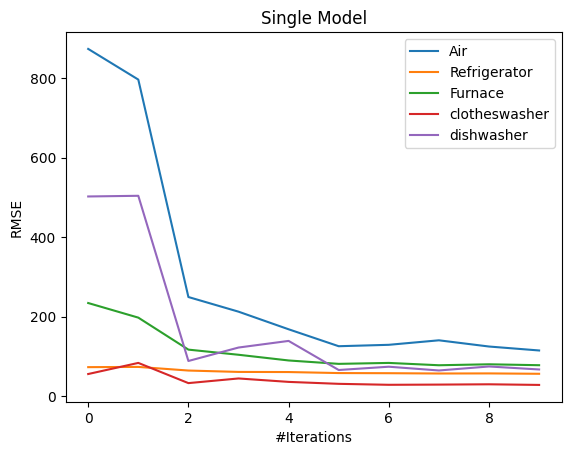

In [13]:
for i in range(5):
    plt.plot(d[i])
    plt.xlabel("#Iterations")
    plt.ylabel("RMSE")
    plt.title("Single Model")
    plt.legend(["Air", "Refrigerator", "Furnace", "clotheswasher", "dishwasher"])

In [14]:
import numpy as np
import matplotlib.pyplot as plt

scaled_total_rmse = []
for i in range(5):
    a = np.array(d[i])
    ans = (a - a.min()) / (a.max() - a.min())
    scaled_total_rmse.append(ans)

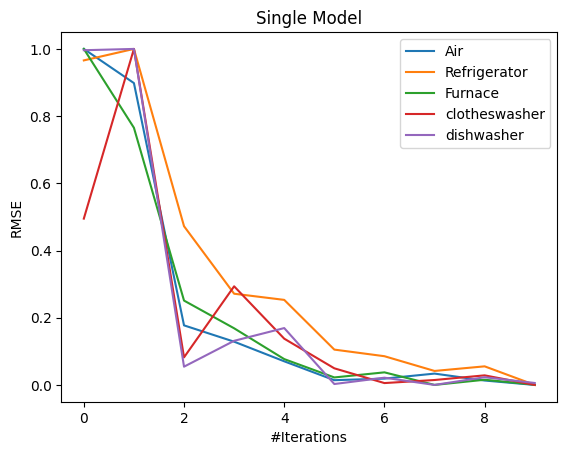

In [15]:
for i in range(5):
    plt.plot(scaled_total_rmse[i])
    plt.xlabel("#Iterations")
    plt.ylabel("RMSE")
    plt.title("Single Model")
    plt.legend(["Air", "Refrigerator", "Furnace", "clotheswasher", "dishwasher"])

In [17]:
maes_df = pd.DataFrame(maes)

In [18]:
maes_df

,0,1,2,3,4
0,370.93323,43.826195,121.70309,24.835651,295.3451
1,336.9009,45.349533,99.10859,30.029428,270.16418
2,90.167656,38.236385,61.969753,9.299639,16.175865
3,66.32273,35.2193,55.488094,10.867565,21.81524
4,54.437027,33.6175,47.57433,8.496255,24.281603
5,49.357338,31.460299,41.009743,6.107175,9.42086
6,47.905937,30.49645,41.418377,5.1942377,9.991683
7,51.74238,29.623821,38.516228,5.524585,8.619263
8,46.80274,29.090317,37.835934,5.9857297,10.715886
9,41.538406,28.177666,36.516,4.913668,10.406894


In [24]:
print(
    data_aggregated["air1"].mean() * 1000,
    data_aggregated["refrigerator1"].mean() * 1000,
    data_aggregated["furnace1"].mean() * 1000,
    data_aggregated["clotheswasher1"].mean() * 1000,
    data_aggregated["dishwasher1"].mean() * 1000,
)

476.43363187740937 87.47676947263092 192.33786413596331 9.302824800620433 12.919523705362451
